In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

We do not need the following columns:
1. Date
2. Helpful Votes
3. Words
Since we cannot process dates and the other 2 since they are representing the same data as theit Z-Scores

In [2]:
data = pd.read_csv(r'C:\Users\aksha\PycharmProjects\FinalProject_WorkingCopy\FinalFeatures.csv')
data_less_columns = data.drop(['Date','Helpful Votes','Words'],axis = 1)
data_less_columns.head()

,Stars,Z_Score_HelpfulVotes,Z_Score_Words,Paragraphs,No.break tags,Percentage_Upper_Case,Percentage_Lower_Case,Avg_len_paragraph_per_review
0,3,-0.235881,6.453577,1,0,3,93,3087.000000
1,5,0.915696,1.394079,3,4,3,91,300.000000
2,4,1.491485,3.666459,4,6,4,90,468.500000
3,4,5.522007,8.525083,11,20,3,91,394.272727
4,5,0.339908,1.795826,2,1,6,91,492.000000


We want to perform PCA on the data in order to reduce the number of dimensions it has.

PCA is known to work better when the data is properly scaled. Now, since the data has a wide variety of scales, dimensionality reduction will not be accurate until the data is rescaled.

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

rescaled_data = scaler.fit_transform(data_less_columns)
rescaled_data = pd.DataFrame(rescaled_data,columns=data_less_columns.columns)
rescaled_data.head()

,Stars,Z_Score_HelpfulVotes,Z_Score_Words,Paragraphs,No.break tags,Percentage_Upper_Case,Percentage_Lower_Case,Avg_len_paragraph_per_review
0,0.50,0.000484,0.315262,0.000000,0.000000,0.03,0.93,0.417478
1,1.00,0.025593,0.091377,0.015873,0.026846,0.03,0.91,0.040449
2,0.75,0.038147,0.191931,0.023810,0.040268,0.04,0.90,0.063244
3,0.75,0.126026,0.406928,0.079365,0.134228,0.03,0.91,0.053202
4,1.00,0.013038,0.109154,0.007937,0.006711,0.06,0.91,0.066423


Now, we will try to perform PCA on the rescaled data

In [5]:
pca_rescaled = PCA(n_components=6)
pca_rescaled_data = pca_rescaled.fit_transform(rescaled_data)
print(pca_rescaled_data.shape)
pca_rescaled.components_

(30453, 6)


array([[-0.99923564,  0.00680071,  0.02713992,  0.00631922,  0.00865992,
        -0.01150881,  0.00857871,  0.02059945],
       [-0.01591249,  0.00390567, -0.04137956,  0.00138132,  0.00105279,
         0.61199437, -0.78805948, -0.04941052],
       [ 0.0340494 ,  0.3078668 ,  0.81821007,  0.22493907,  0.29796715,
        -0.02985177, -0.08305264,  0.29566887],
       [-0.00647678,  0.30525113, -0.12223013,  0.22720997,  0.26972108,
        -0.538014  , -0.37247251, -0.58246968],
       [-0.00747782,  0.26927012, -0.00168815,  0.21223104,  0.25557139,
         0.57813331,  0.48260195, -0.49993331],
       [ 0.00398709,  0.34524457, -0.55608298,  0.3753887 ,  0.33401698,
         0.02594515,  0.01671839,  0.564026  ]])

Hierarchical Clustering

In Hierarchical Clustering, we do not decide the number of clusters arbitrarily. Rather the ideal number of clusters id determined based on a unique graph known as dendrograms. 

Using the dendrogram to find the optimal number of clusters.

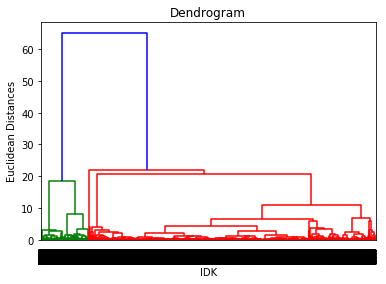

In [7]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(pca_rescaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('IDK')
plt.ylabel('Euclidean Distances')
plt.show()

Fitting Hierarchical Clustering to our dataset

In [9]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage= 'ward')
hc_cluster_no_each_review = hc.fit_predict(rescaled_data)

In [11]:
hc_cluster_no_each_review = pd.Series(hc_cluster_no_each_review)
hc_cluster_no_each_review

0        0
1        1
2        3
3        3
4        1
5        0
6        0
7        3
8        0
9        0
10       3
11       0
12       3
13       0
14       0
15       0
16       3
17       0
18       3
19       0
20       1
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
30423    3
30424    1
30425    1
30426    0
30427    0
30428    1
30429    1
30430    1
30431    1
30432    1
30433    1
30434    1
30435    1
30436    1
30437    1
30438    3
30439    1
30440    1
30441    1
30442    1
30443    1
30444    1
30445    1
30446    1
30447    1
30448    1
30449    3
30450    1
30451    1
30452    1
Length: 30453, dtype: int64